In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        plt.colorbar()
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_gaussian_SNR0_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_gaussian_SNR0_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den0.png'
]
roi_coords = (50, 50, 10, 10)
noise_coords = (10, 10, 10, 10)
roi2_coords = (70, 70, 10, 10)  # Example secondary ROI for CNR calculation

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_gaussian_SNR0_magfield_0_frame_0.tif
SNR: 4.08581126939926, CNR: 0.32022852143857067
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_gaussian_SNR0_magfield_0_frame_0.tif
SNR: 1.56900155544281, CNR: 0.41873595118522644
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den0.png
SNR: 1.5237087268920875, CNR: 0.24283913563534135


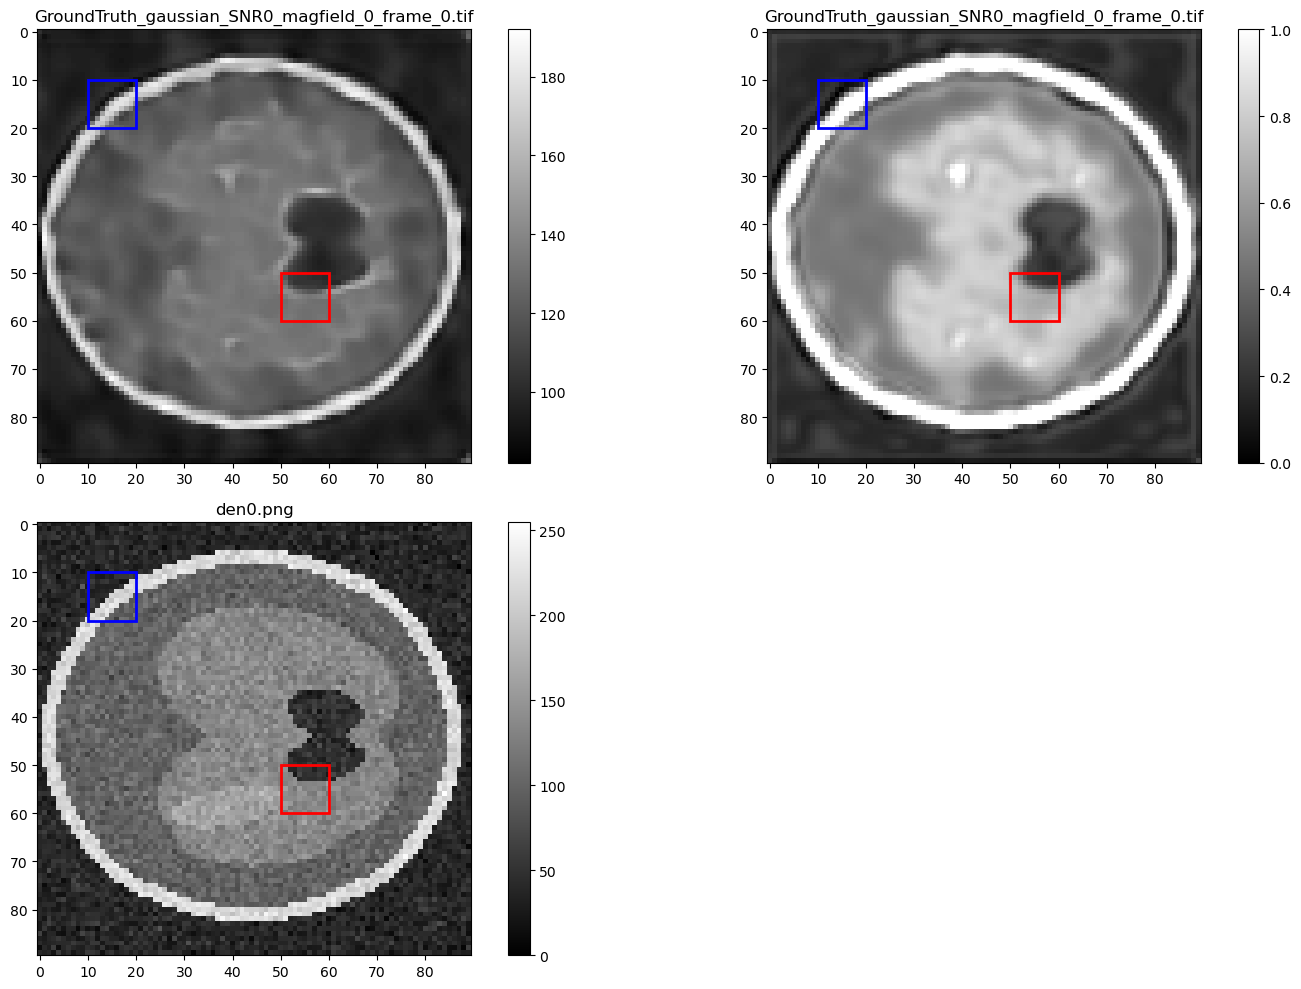

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    # Adjust the ROI slicing for 2D images
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image, cmap='gray')  # Directly display the 2D image
        plt.colorbar()
        
        # Draw the signal and noise ROIs
        for coords, color in [(roi_coords, 'red'), (noise_coords, 'blue')]:
            x, y, width, height = coords
            plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor=color, facecolor='none', linewidth=2))
        
        title = image_path.split('/')[-1]
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage with your specified paths and ROI coordinates
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_gaussian_SNR0_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_gaussian_SNR0_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den0.png'
]
roi_coords = (50, 50, 10, 10)  # Signal ROI
noise_coords = (10, 10, 10, 10)  # Noise ROI
roi2_coords = (70, 70, 10, 10)  # Secondary ROI for CNR

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords)


Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_gaussian_SNR5_magfield_0_frame_0.tif
SNR: 2.359225850928331, CNR: 0.3646281162327367
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_gaussian_SNR5_magfield_0_frame_0.tif
SNR: 1.2957485914230347, CNR: 0.6137087941169739
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den5.png
SNR: 1.3811150492849218, CNR: 0.23768901697157976


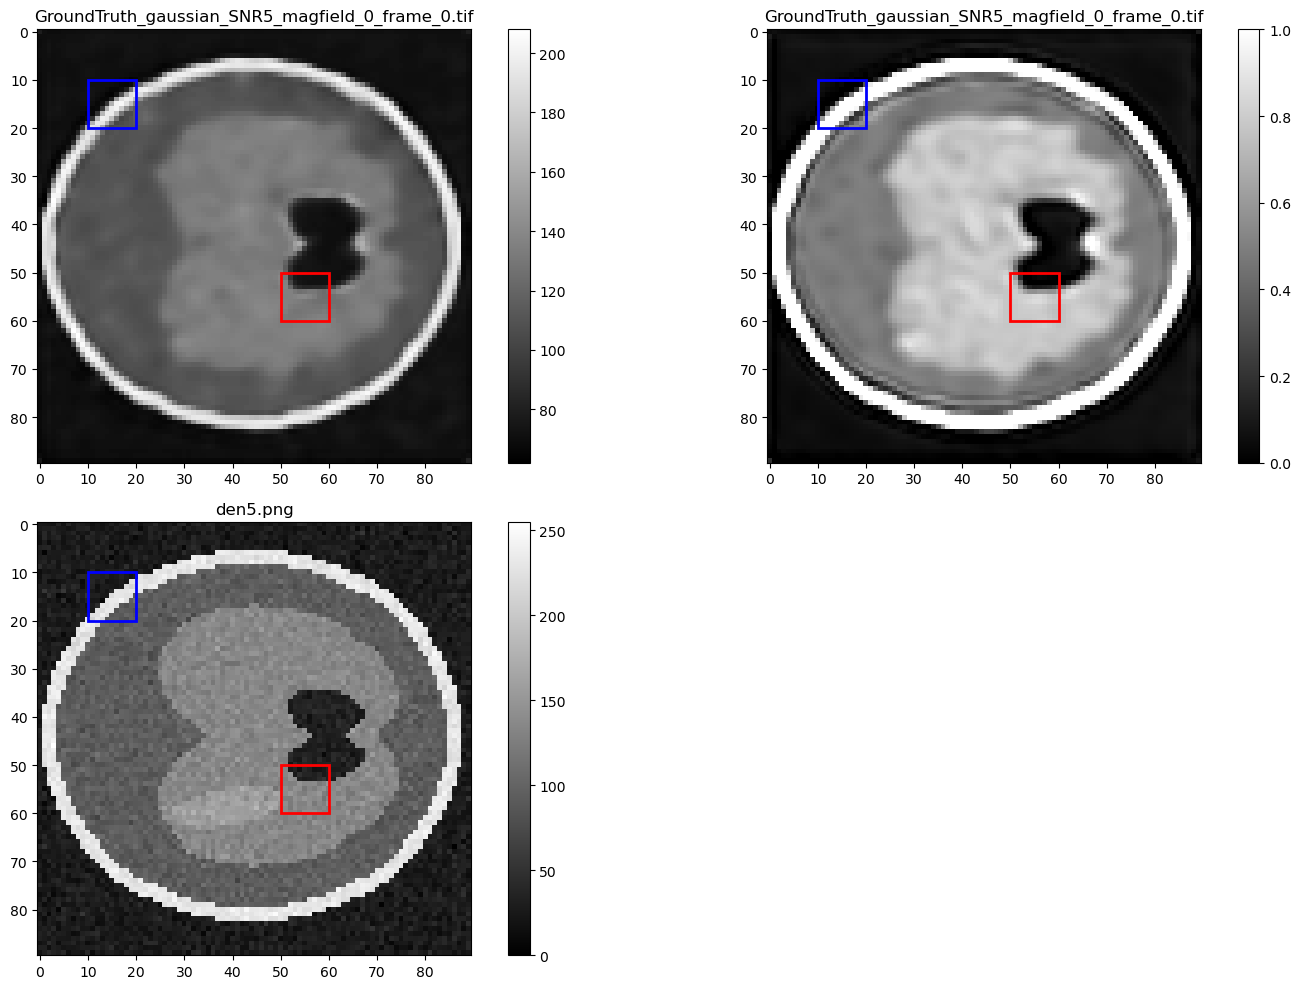

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    # Adjust the ROI slicing for 2D images
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image, cmap='gray')  # Directly display the 2D image
        plt.colorbar()
        
        # Draw the signal and noise ROIs
        for coords, color in [(roi_coords, 'red'), (noise_coords, 'blue')]:
            x, y, width, height = coords
            plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor=color, facecolor='none', linewidth=2))
        
        title = image_path.split('/')[-1]
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage with your specified paths and ROI coordinates
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_gaussian_SNR5_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_gaussian_SNR5_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den5.png'
]
roi_coords = (50, 50, 10, 10)  # Signal ROI
noise_coords = (10, 10, 10, 10)  # Noise ROI
roi2_coords = (70, 70, 10, 10)  # Secondary ROI for CNR

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords)


Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_gaussian_SNR10_magfield_0_frame_0.tif
SNR: 1.8819706138377632, CNR: 0.4009702367573323
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_gaussian_SNR10_magfield_0_frame_0.tif
SNR: 1.2890894412994385, CNR: 0.6641724705696106
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den10.png
SNR: 1.2788944825003186, CNR: 0.24564338939345323


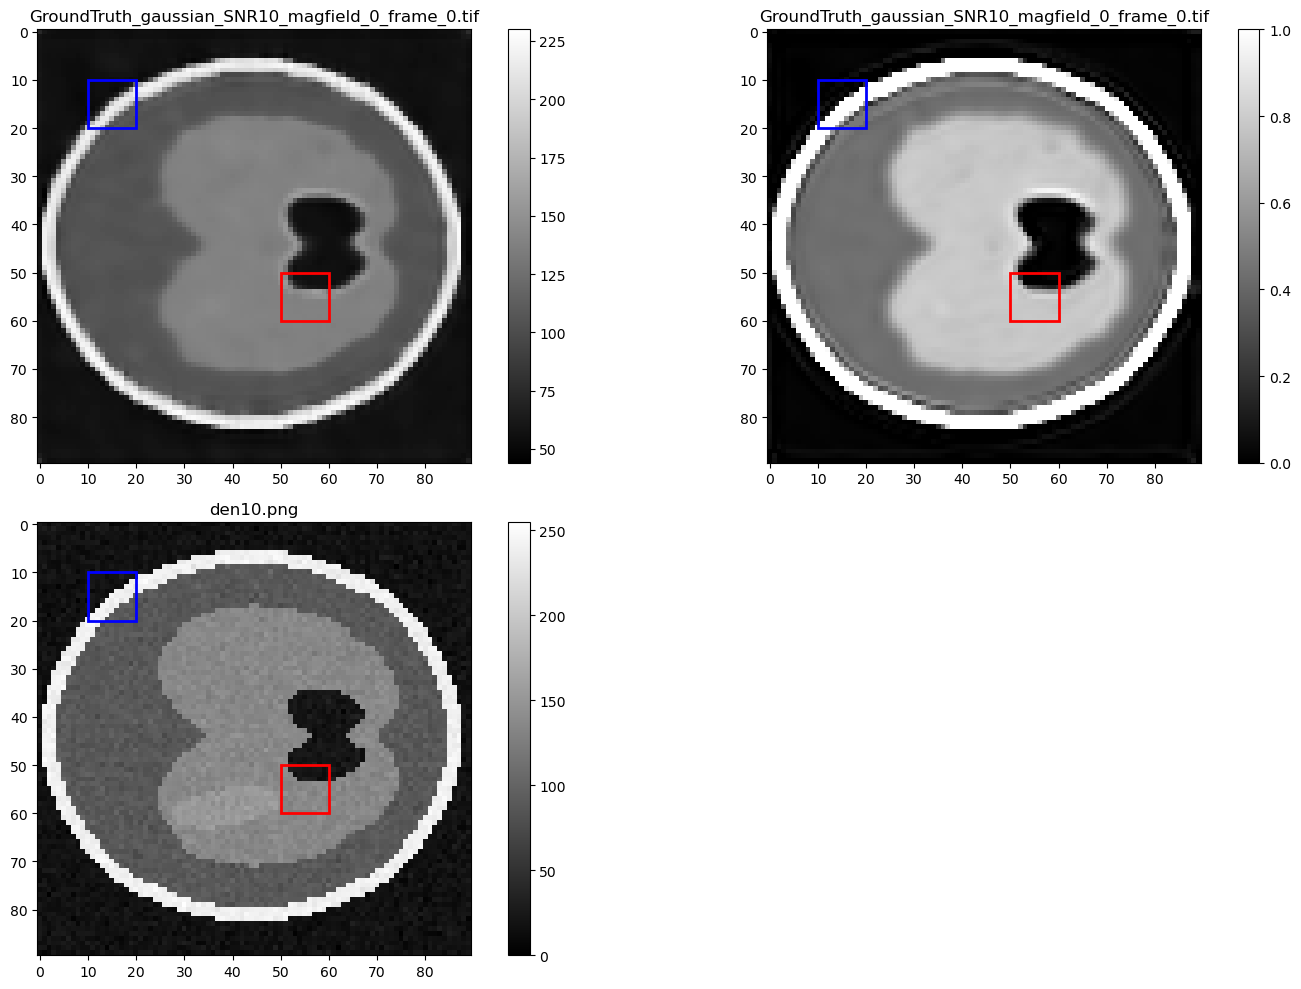

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    # Adjust the ROI slicing for 2D images
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image, cmap='gray')  # Directly display the 2D image
        
        
        # Draw the signal and noise ROIs
        for coords, color in [(roi_coords, 'red'), (noise_coords, 'blue')]:
            x, y, width, height = coords
            plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor=color, facecolor='none', linewidth=2))
        
        title = image_path.split('/')[-1]
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage with your specified paths and ROI coordinates
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_gaussian_SNR10_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_gaussian_SNR10_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den10.png'
]
roi_coords = (50, 50, 10, 10)  # Signal ROI
noise_coords = (10, 10, 10, 10)  # Noise ROI
roi2_coords = (70, 70, 10, 10)  # Secondary ROI for CNR

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords)

Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_rician_SNR0_magfield_0_frame_0.tif
SNR: 2.907458980133773, CNR: 0.34574809294829917
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_rician_SNR0_magfield_0_frame_0.tif
SNR: 1.5042284727096558, CNR: 0.6176460385322571
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr0.png
SNR: 1.5237087268920875, CNR: 0.24283913563534135


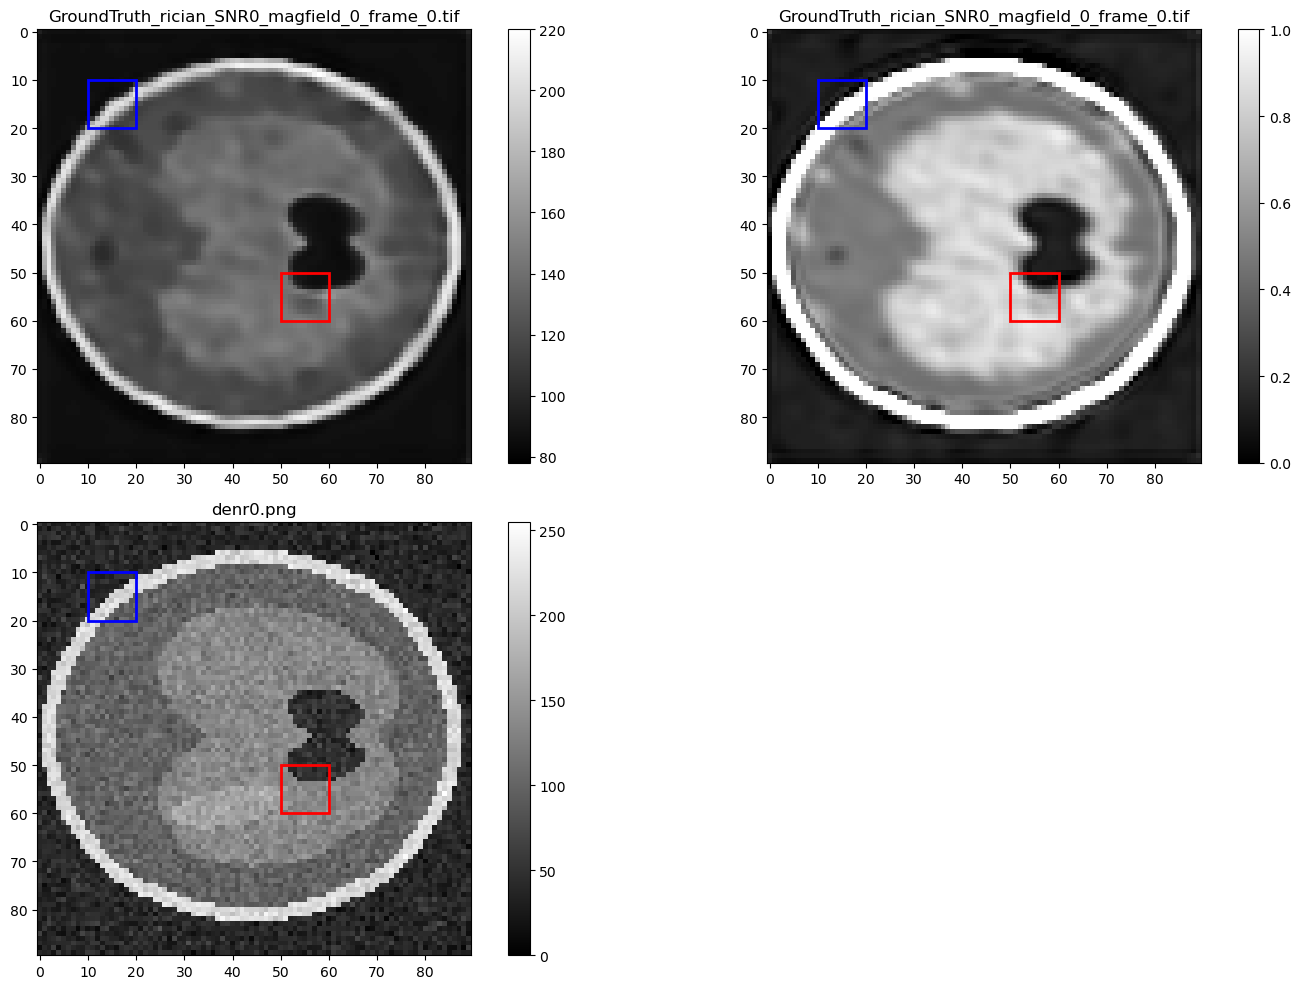

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    # Adjust the ROI slicing for 2D images
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image, cmap='gray')  # Directly display the 2D image
        plt.colorbar()
        
        # Draw the signal and noise ROIs
        for coords, color in [(roi_coords, 'red'), (noise_coords, 'blue')]:
            x, y, width, height = coords
            plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor=color, facecolor='none', linewidth=2))
        
        title = image_path.split('/')[-1]
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage with your specified paths and ROI coordinates
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_rician_SNR0_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_rician_SNR0_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr0.png'
]
roi_coords = (50, 50, 10, 10)  # Signal ROI
noise_coords = (10, 10, 10, 10)  # Noise ROI
roi2_coords = (70, 70, 10, 10)  # Secondary ROI for CNR

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords)

Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_rician_SNR5_magfield_0_frame_0.tif
SNR: 1.9725837647564703, CNR: 0.3970820203776911
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_rician_SNR5_magfield_0_frame_0.tif
SNR: 1.3188612461090088, CNR: 0.6022992730140686
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr5.png
SNR: 1.3811150492849218, CNR: 0.23768901697157976


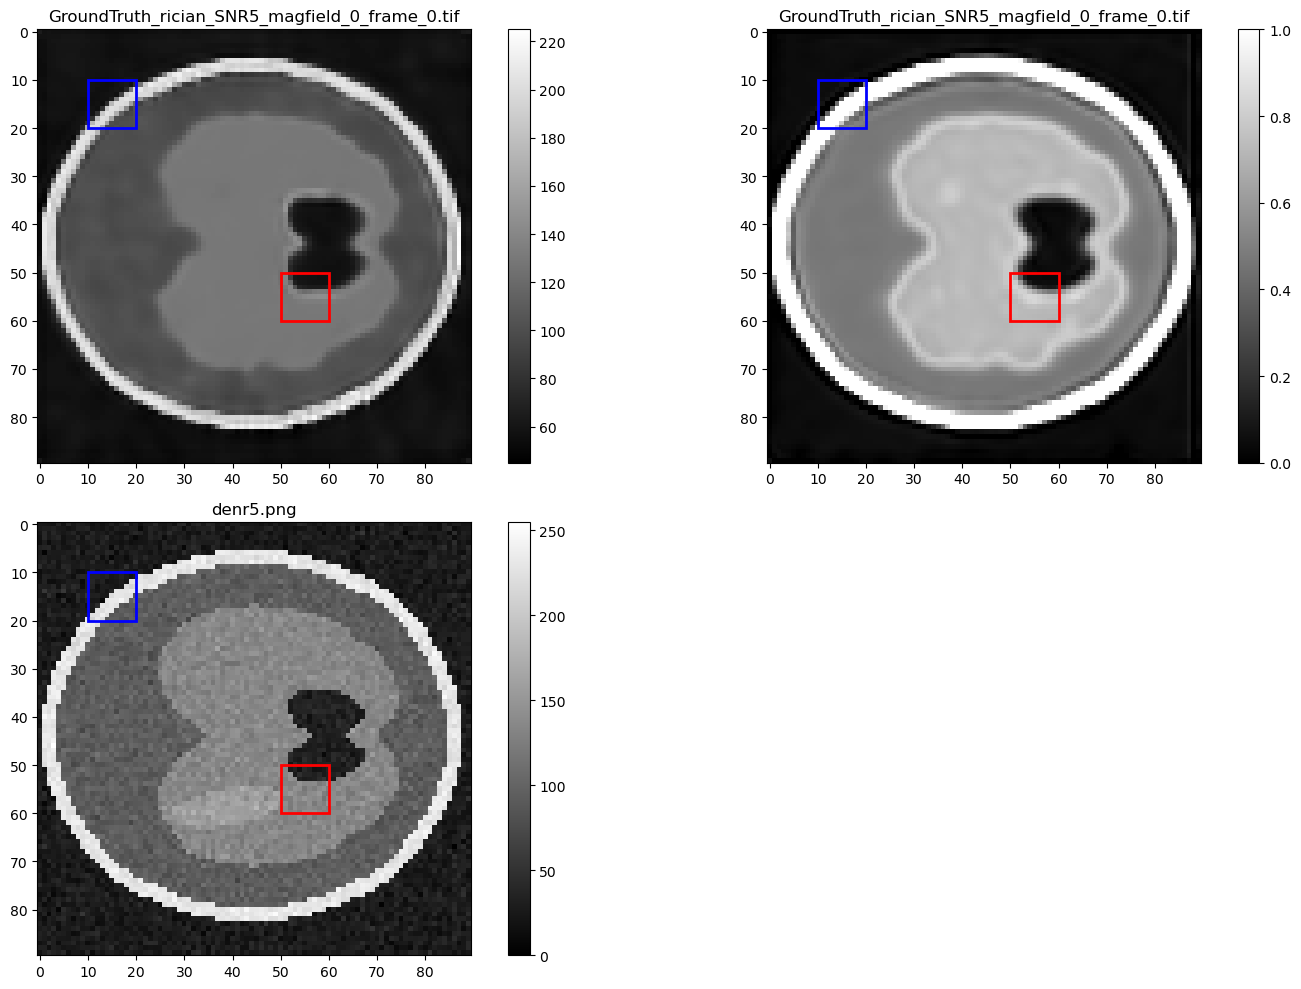

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    # Adjust the ROI slicing for 2D images
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image, cmap='gray')  # Directly display the 2D image
        plt.colorbar()
        
        # Draw the signal and noise ROIs
        for coords, color in [(roi_coords, 'red'), (noise_coords, 'blue')]:
            x, y, width, height = coords
            plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor=color, facecolor='none', linewidth=2))
        
        title = image_path.split('/')[-1]
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage with your specified paths and ROI coordinates
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_rician_SNR5_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_rician_SNR5_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr5.png'
]
roi_coords = (50, 50, 10, 10)  # Signal ROI
noise_coords = (10, 10, 10, 10)  # Noise ROI
roi2_coords = (70, 70, 10, 10)  # Secondary ROI for CNR

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords)

Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_rician_SNR10_magfield_0_frame_0.tif
SNR: 1.4683864004574472, CNR: 0.355350894834629
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_rician_SNR10_magfield_0_frame_0.tif
SNR: 1.3964406251907349, CNR: 0.7729345560073853
Image: ../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr10.png
SNR: 1.2788944825003186, CNR: 0.24564338939345323


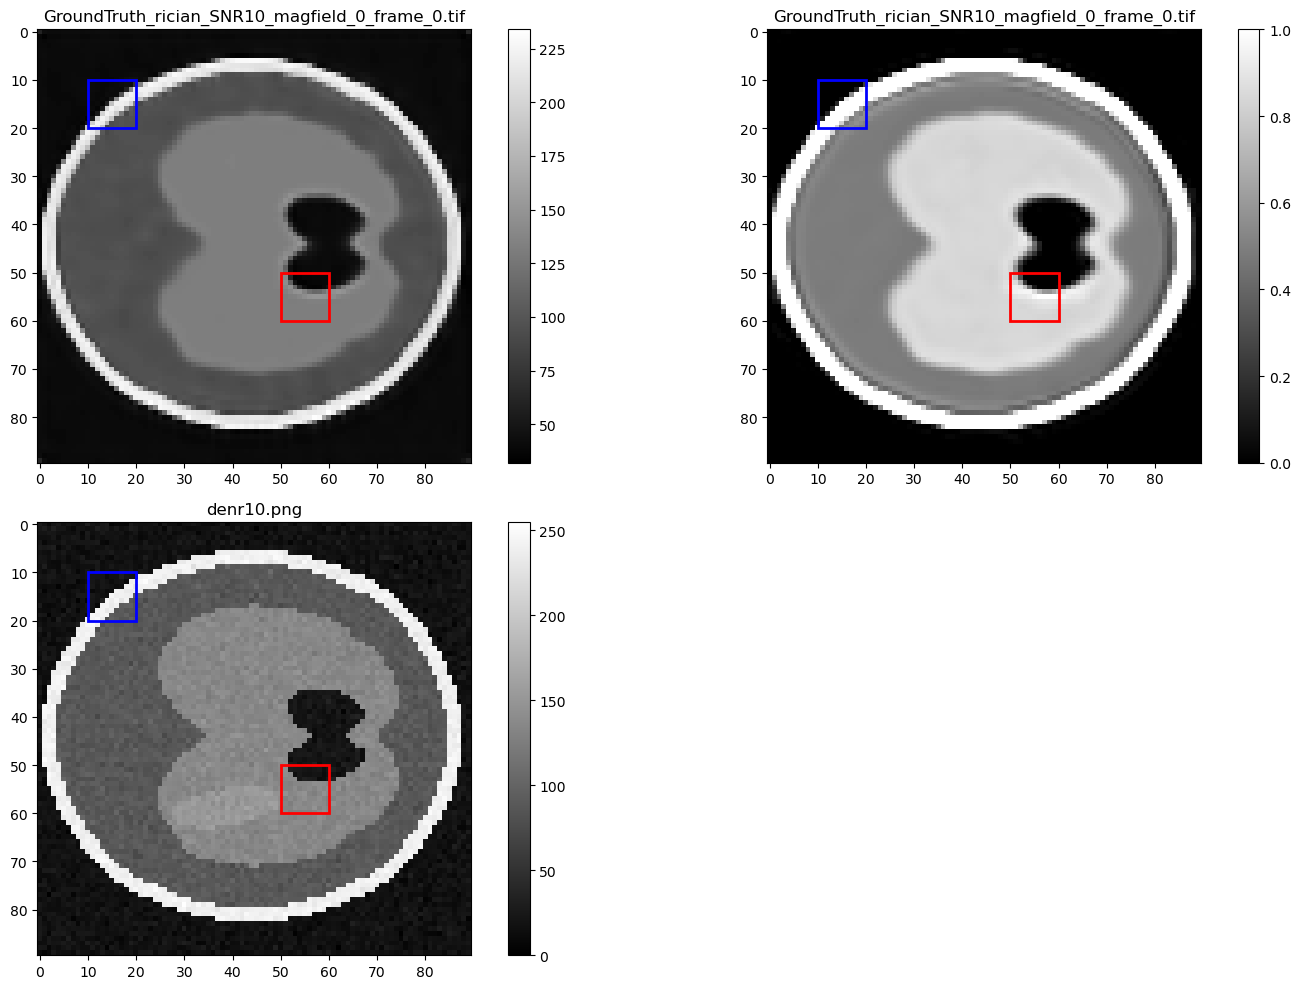

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    # Adjust the ROI slicing for 2D images
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image, cmap='gray')  # Directly display the 2D image
        plt.colorbar()
        
        # Draw the signal and noise ROIs
        for coords, color in [(roi_coords, 'red'), (noise_coords, 'blue')]:
            x, y, width, height = coords
            plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor=color, facecolor='none', linewidth=2))
        
        title = image_path.split('/')[-1]
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

# Example usage with your specified paths and ROI coordinates
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/GroundTruth_rician_SNR10_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/GroundTruth_rician_SNR10_magfield_0_frame_0.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr10.png'
]
roi_coords = (50, 50, 10, 10)  # Signal ROI
noise_coords = (10, 10, 10, 10)  # Noise ROI
roi2_coords = (70, 70, 10, 10)  # Secondary ROI for CNR

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords)